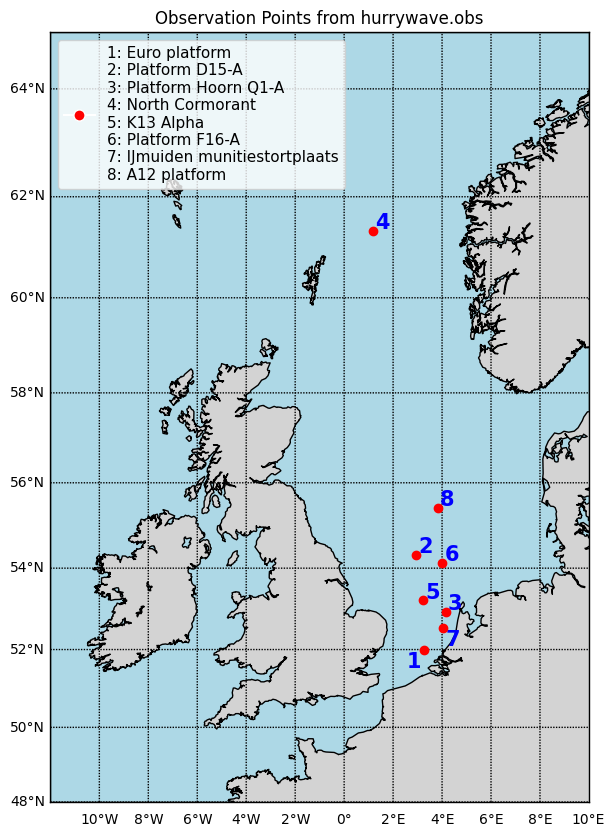

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Path to your .obs file
obs_file = "/gpfs/work3/0/ai4nbs/hurry_wave/north_sea/08_Sims/templates/hurrywave.obs"

# Read the coordinates and names
lons, lats, names = [], [], []
with open(obs_file, "r") as f:
    for line in f:
        if line.strip() and not line.startswith("#"):
            parts = line.split("#")
            coords = parts[0].strip().split()
            lon, lat = float(coords[0]), float(coords[1])
            name = parts[1].strip() if len(parts) > 1 else "Unknown"
            lons.append(lon)
            lats.append(lat)
            names.append(name)

# Create map (covers North Sea region)
plt.figure(figsize=(8,10))
m = Basemap(projection="merc",
            llcrnrlat=48, urcrnrlat=65,
            llcrnrlon=-12, urcrnrlon=10,
            resolution="i")

m.drawcoastlines()
m.fillcontinents(color="lightgray", lake_color="lightblue")
m.drawmapboundary(fill_color="lightblue")
m.drawparallels(range(48,66,2), labels=[1,0,0,0])
m.drawmeridians(range(-10,13,2), labels=[0,0,0,1])

# Plot points
x, y = m(lons, lats)
m.scatter(x, y, c="red", marker="o", zorder=5)

# Label points with numbers
for i, (xx, yy) in enumerate(zip(x, y), start=1):
    if i==1:
        plt.text(xx-80000, yy-80000, str(i), fontsize=15, color="blue", weight="bold")
    elif i==7:
        plt.text(xx+10000, yy-80000, str(i), fontsize=15, color="blue", weight="bold")
    else:
        plt.text(xx+10000, yy+10000, str(i), fontsize=15, color="blue", weight="bold")


# Add legend
legend_text = "\n".join([f"{i+1}: {name}" for i, name in enumerate(names)])
plt.legend([plt.Line2D([0],[0], marker="o", color="w", markerfacecolor="red", markersize=8)],
           [legend_text],
           loc="upper left", fontsize=11, frameon=True)

plt.title("Observation Points from hurrywave.obs")
plt.show()